In [30]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_path = 'AppleGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)
font_name = fm.FontProperties(fname=font_path).get_name()

In [89]:
weather = pd.read_csv("제주기상자료(월단위).csv", encoding="cp949")

In [134]:
jeju = weather[weather['지점명']=='제주']
gosan = weather[weather['지점명']=='고산']
seongsan = weather[weather['지점명']=='성산']
seogwipo = weather[weather['지점명']=='서귀포']

In [135]:
jeju_rain = jeju.drop(['지점','지점명','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)'], axis=1, inplace=False)
gosan_rain = gosan.drop(['지점','지점명','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)'], axis=1, inplace=False)
seongsan_rain = seongsan.drop(['지점','지점명','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)'], axis=1, inplace=False)
seogwipo_rain = seogwipo.drop(['지점','지점명','평균기온(°C)','평균최고기온(°C)','평균최저기온(°C)'], axis=1, inplace=False)

In [136]:
from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' %result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' %(key, value))

In [137]:
adf_test(jeju_rain['월합강수량(00~24h만)(mm)'])

ADF Statistics: -4.208390
p-value: 0.000638
Critical values:
	1%: -3.639
	5%: -2.951
	10%: -2.614


In [138]:
adf_test(gosan_rain['월합강수량(00~24h만)(mm)'])

ADF Statistics: -4.489524
p-value: 0.000205
Critical values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [139]:
adf_test(seongsan_rain['월합강수량(00~24h만)(mm)'])

ADF Statistics: -3.417401
p-value: 0.010380
Critical values:
	1%: -3.616
	5%: -2.941
	10%: -2.609


In [140]:
adf_test(seogwipo_rain['월합강수량(00~24h만)(mm)'])

ADF Statistics: -4.813489
p-value: 0.000051
Critical values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [141]:
jeju_rain.to_csv("jeju_rain.csv",index=False, encoding='cp949' )
seogwipo_rain.to_csv("seogwipo_rain.csv", index=False, encoding='cp949')
gosan_rain.to_csv("gosan_rain.csv", index=False, encoding='cp949')
seongsan_rain.to_csv("seongsan_rain.csv", index=False, encoding='cp949')

In [142]:
jeju_rain.iloc[[5,6,7,8,17,18,19,20,29,30,31,32]].mean()

월합강수량(00~24h만)(mm)    273.325
dtype: float64

In [143]:
seogwipo_rain.iloc[[5,6,7,8,17,18,19,20,29,30,31,32]].mean()

월합강수량(00~24h만)(mm)    302.208333
dtype: float64

In [144]:
gosan_rain.iloc[[5,6,7,8,17,18,19,20,29,30,31,32]].mean()

월합강수량(00~24h만)(mm)    200.783333
dtype: float64

In [145]:
seongsan_rain.iloc[[5,6,7,8,17,18,19,20,29,30,31,32]].mean()

월합강수량(00~24h만)(mm)    343.491667
dtype: float64

In [146]:
new_row= {'일시': '2021-07', '월합강수량(00~24h만)(mm)':  273.3}
jeju_rain_new = jeju_rain.append(new_row, ignore_index=True)
adf_test(jeju_rain_new['월합강수량(00~24h만)(mm)'])

ADF Statistics: -4.501923
p-value: 0.000195
Critical values:
	1%: -3.633
	5%: -2.949
	10%: -2.613


In [147]:
new_row= {'일시': '2021-07', '월합강수량(00~24h만)(mm)':  302.2}
seogwipo_rain_new = seogwipo_rain.append(new_row, ignore_index=True)
adf_test(seogwipo_rain_new['월합강수량(00~24h만)(mm)'])

ADF Statistics: -4.990718
p-value: 0.000023
Critical values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


In [148]:
new_row= {'일시': '2021-07', '월합강수량(00~24h만)(mm)':  200.8}
gosan_rain_new = gosan_rain.append(new_row, ignore_index=True)
adf_test(gosan_rain_new['월합강수량(00~24h만)(mm)'])

ADF Statistics: -4.598882
p-value: 0.000130
Critical values:
	1%: -3.627
	5%: -2.946
	10%: -2.612


In [149]:
new_row= {'일시': '2021-07', '월합강수량(00~24h만)(mm)':  343.5}
seongsan_rain_new = seongsan_rain.append(new_row, ignore_index=True)
adf_test(seongsan_rain_new['월합강수량(00~24h만)(mm)'])

ADF Statistics: -3.180876
p-value: 0.021119
Critical values:
	1%: -3.606
	5%: -2.937
	10%: -2.607


In [150]:
jeju_rain_new.to_csv("제주 관측지 강수량.csv", index=False, encoding='cp949')
seogwipo_rain_new.to_csv("서귀포 관측지 강수량.csv", index=False, encoding='cp949')
gosan_rain_new.to_csv("고산 관측지 강수량.csv", index=False, encoding='cp949')
seongsan_rain_new.to_csv("성산 관측지 강수량.csv", index=False, encoding='cp949')

In [18]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [19]:
kpss_test(jeju_rain['월합강수량(00~24h만)(mm)'])

Results of KPSS Test:
Test Statistic           0.07919
p-value                  0.10000
Lags Used                3.00000
Critical Value (10%)     0.34700
Critical Value (5%)      0.46300
Critical Value (2.5%)    0.57400
Critical Value (1%)      0.73900
dtype: float64


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [20]:
kpss_test(gosan_rain['월합강수량(00~24h만)(mm)'])

Results of KPSS Test:
Test Statistic           0.044749
p-value                  0.100000
Lags Used                3.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [21]:
kpss_test(seongsan_rain['월합강수량(00~24h만)(mm)'])

Results of KPSS Test:
Test Statistic           0.067094
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


In [22]:
kpss_test(seogwipo_rain['월합강수량(00~24h만)(mm)'])

Results of KPSS Test:
Test Statistic           0.053657
p-value                  0.100000
Lags Used                2.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


/home/yoonjeong.won/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/stattools.py:1687: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


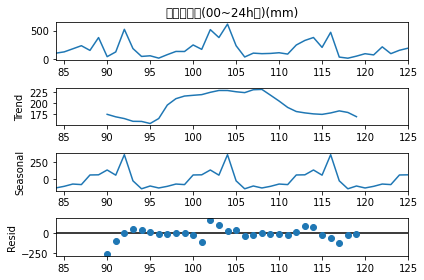

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(seongsan_rain['월합강수량(00~24h만)(mm)'],model='additive', period=12)
ax=res.plot()
plt.show()

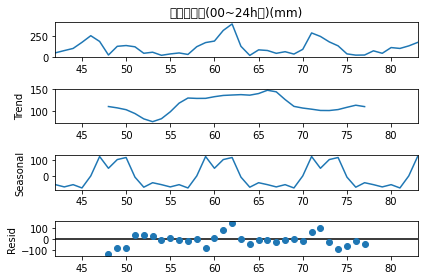

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(gosan_rain['월합강수량(00~24h만)(mm)'],model='additive', period=12)
ax=res.plot()
plt.show()

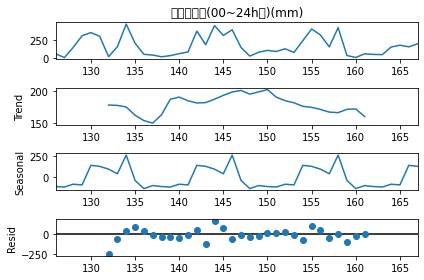

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(seogwipo_rain['월합강수량(00~24h만)(mm)'],model='additive', period=12)
ax=res.plot()
plt.show()

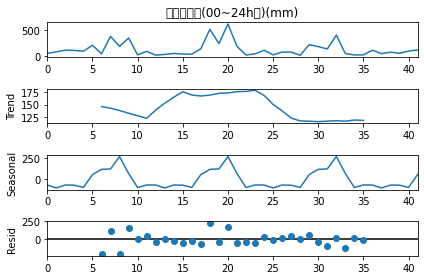

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
res = seasonal_decompose(jeju_rain['월합강수량(00~24h만)(mm)'],model='additive', period=12)
ax=res.plot()
plt.show()

In [47]:
from statsmodels.tsa.stattools import adfuller

def adfuller_test(data):
    result = adfuller(data)
    print('Augmented Dickey-Fuller Unit Root Test:')
    labels = ['Test Statistic', 'p-value', 'Number of Lags', 'Number of Obsevations']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
        
    if result[1] <= 0.05:
        print("Reject the null hypothesis. Data has no unit root and is stationary")
    else: 
        print("Time series has a unit root, indicating it is non-stationary")

In [ ]:
model = sm.tsa.statespace.SARIMAX(jeju_rain['월합강수량(00~24h만)(mm)'],order=(1,d,q), seasonal_order=(P,1,Q,S))

In [70]:
#Differencing
jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'] = jeju_rain['월합강수량(00~24h만)(mm)'] - jeju_rain['월합강수량(00~24h만)(mm)'].shift(1)
jeju_rain['월합강수량(00~24h만)(mm) 2nd Diff'] = jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'] - jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'].shift(1)

#Seasonal Differencing
jeju_rain['Seasonal Diff'] = jeju_rain['월합강수량(00~24h만)(mm)'] - jeju_rain['월합강수량(00~24h만)(mm)'].shift(12)
jeju_rain['Seasonal 1st Diff'] = jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'] - jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'].shift(12)

#1st Differncing adfuller test
adfuller_test(jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'].dropna())

#1st Seasonal Differencing 
adfuller_test(jeju_rain['Seasonal 1st Diff'].dropna())

#d=1, D=1로 지정

Augmented Dickey-Fuller Unit Root Test:
Test Statistic : -3.892985789396801
p-value : 0.00208707855585397
Number of Lags : 10
Number of Obsevations : 30
Reject the null hypothesis. Data has no unit root and is stationary
Augmented Dickey-Fuller Unit Root Test:
Test Statistic : -14.608789371356801
p-value : 4.054209230951041e-27
Number of Lags : 0
Number of Obsevations : 28
Reject the null hypothesis. Data has no unit root and is stationary


findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


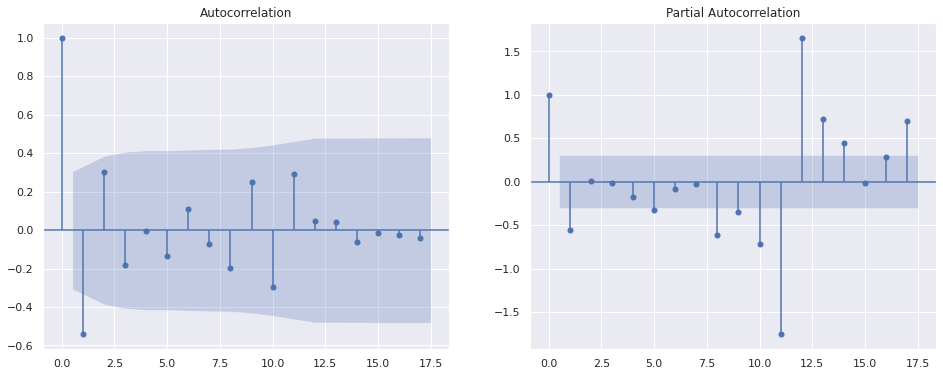

<Figure size 432x288 with 0 Axes>

In [73]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(16,6)
fig = plt.figure()
ax1 = plot_acf(jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'].dropna(), ax=ax1)
ax2 = plot_pacf(jeju_rain['월합강수량(00~24h만)(mm) 1st Diff'].dropna(), ax=ax2)

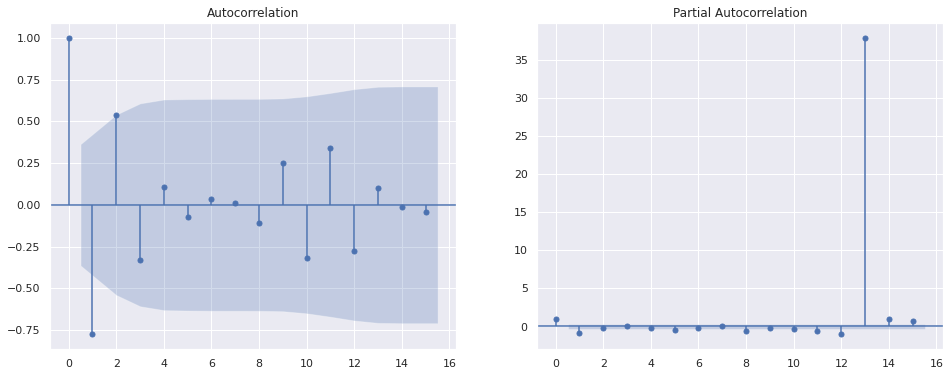

In [74]:
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(16,6)
ax1 = plot_acf(jeju_rain['Seasonal 1st Diff'].dropna(), ax=ax1)
ax2 = plot_pacf(jeju_rain['Seasonal 1st Diff'].dropna(), ax=ax2)

In [86]:
import itertools

d = range(1, 2)
p = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
#P,D,Q,S의 경우에는 위에서 각각 1,1,1,12로 결정

for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(jeju_rain['월합강수량(00~24h만)(mm)'],order=param, seasonal_order=(1,1,1,12))
    results = mod.fit()
    print('ARIMA{}x{}12 - AIC:{} - BIC {}'.format(param,param_seasonal,results.aic,results.bic))

NameError: name 'param_seasonal' is not defined

[(0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2)]